In [8]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models, Input, Model, activations
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, confusion_matrix, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay, average_precision_score
from src.tf_tools import cnn_classifier


In [9]:
def one_hot_seqs(seqs) -> np.array:
    static_1hotmap = {
        'A' : np.array([1,0,0,0]),
        'a' : np.array([1,0,0,0]),
        'C' : np.array([0,1,0,0]),
        'c' : np.array([0,1,0,0]),
        'G' : np.array([0,0,1,0]),
        'g' : np.array([0,0,1,0]),
        'T' : np.array([0,0,0,1]),
        't' : np.array([0,0,0,1]),
    }
    onehot_seqs = []
    for seq in seqs:
        onehot_seqs.append(
            [static_1hotmap[seq[i]] if seq[i] in static_1hotmap.keys() else static_1hotmap[random.choice(['A','C','G','T'])] for i in range(len(seq))]
        )
    return np.stack(onehot_seqs)


In [10]:
LABEL_KEY = 'open'
data_file = "Data/ATAC/labeled_data_164.csv"
FEATURE_KEY = 'sequence'
fold=1
epochs=50
batch_size=164
lr = 0.0001 

In [11]:

data_df = pd.read_csv(data_file, index_col = 0)
test_df = data_df[data_df['set'] == 'TEST']
validation_df = data_df[(data_df['fold'] == fold) & ((data_df['set'] != 'TEST'))]
train_df = data_df[(data_df['fold'] != fold) & (data_df['set'] != 'TEST')]

print(len(train_df), ": training points", flush=True)
print(len(validation_df), ": validation points", flush=True)
print(len(test_df), ": reserved testing points", flush=True)

#############################################################
# Prepare data for fitting
x_train = one_hot_seqs(train_df[FEATURE_KEY])
x_validation = one_hot_seqs(validation_df[FEATURE_KEY])
x_test = one_hot_seqs(test_df[FEATURE_KEY])

encoder = LabelEncoder()
encoder.fit(data_df[LABEL_KEY])
classes = encoder.classes_
num_classes = len(classes)
y_train = encoder.transform(train_df[LABEL_KEY])
y_validation = encoder.transform(validation_df[LABEL_KEY])
y_test = encoder.transform(test_df[LABEL_KEY])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_validation, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


39127 : training points
6494 : validation points
8011 : reserved testing points


In [12]:
# Early stopping setup
earlystop_cb = keras.callbacks.EarlyStopping('val_accuracy', patience=10)

# Load model
model = cnn_classifier.getClassCNN(len(x_train[0]),num_classes)

history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_data=(x_validation, y_validation),
    batch_size=batch_size,
    shuffle=True,
    callbacks =[earlystop_cb],
    verbose=1,
)

Epoch 1/50
239/239 [==============================] - 101s 412ms/step - loss: 0.7208 - accuracy: 0.5838 - val_loss: 0.7912 - val_accuracy: 0.4640
Epoch 2/50
239/239 [==============================] - 98s 412ms/step - loss: 0.6180 - accuracy: 0.6625 - val_loss: 0.6560 - val_accuracy: 0.6155
Epoch 3/50
239/239 [==============================] - 98s 410ms/step - loss: 0.5878 - accuracy: 0.6902 - val_loss: 0.5824 - val_accuracy: 0.7051
Epoch 4/50
239/239 [==============================] - 96s 404ms/step - loss: 0.5734 - accuracy: 0.7029 - val_loss: 0.5781 - val_accuracy: 0.6991
Epoch 5/50
239/239 [==============================] - 99s 414ms/step - loss: 0.5576 - accuracy: 0.7148 - val_loss: 0.5807 - val_accuracy: 0.6891
Epoch 6/50
239/239 [==============================] - 99s 414ms/step - loss: 0.5424 - accuracy: 0.7292 - val_loss: 0.6047 - val_accuracy: 0.6702
Epoch 7/50
239/239 [==============================] - 97s 407ms/step - loss: 0.5260 - accuracy: 0.7391 - val_loss: 0.6795 - val_a

KeyboardInterrupt: 

In [5]:
# Create model and callbacks then fit

# Tensorboard setup
# tensor_logs = os.path.join(output_dir, "tb_logs")
# os.makedirs(tensor_logs, exist_ok=True)
# tensorboard_cb = keras.callbacks.TensorBoard(tensor_logs, histogram_freq=1)

# Early stopping setup
earlystop_cb = keras.callbacks.EarlyStopping('val_accuracy', patience=10)

# Load model
model = cnn_classifier.getClassCNN(len(x_train[0]),num_classes)

history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_data=(x_validation, y_validation),
    batch_size=batch_size,
    callbacks =[earlystop_cb],
    verbose=1,
)

Epoch 1/50
306/306 [==============================] - 112s 351ms/step - loss: 0.7101 - accuracy: 0.5988 - val_loss: 0.6509 - val_accuracy: 0.6369
Epoch 2/50
306/306 [==============================] - 109s 357ms/step - loss: 0.6101 - accuracy: 0.6742 - val_loss: 0.5903 - val_accuracy: 0.6973
Epoch 3/50
306/306 [==============================] - 107s 349ms/step - loss: 0.5851 - accuracy: 0.6945 - val_loss: 0.5788 - val_accuracy: 0.6919
Epoch 4/50
306/306 [==============================] - 109s 355ms/step - loss: 0.5650 - accuracy: 0.7094 - val_loss: 0.5825 - val_accuracy: 0.6885
Epoch 5/50
306/306 [==============================] - 108s 352ms/step - loss: 0.5535 - accuracy: 0.7199 - val_loss: 0.5819 - val_accuracy: 0.6846
Epoch 6/50
306/306 [==============================] - 107s 350ms/step - loss: 0.5387 - accuracy: 0.7316 - val_loss: 0.5602 - val_accuracy: 0.7205
Epoch 7/50
306/306 [==============================] - 107s 349ms/step - loss: 0.5256 - accuracy: 0.7407 - val_loss: 0.6204 -

In [6]:
a = pd.DataFrame(history.history)

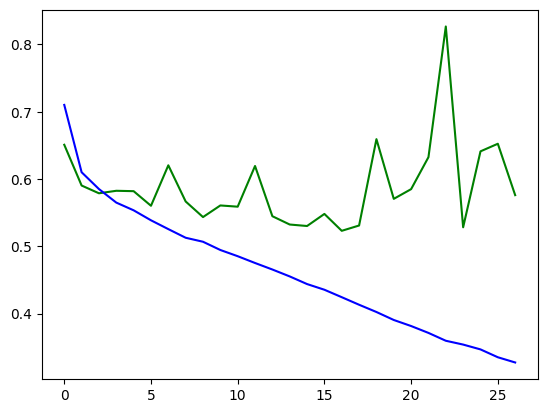

In [7]:
plt.plot(a['val_loss'], c='g',label = 'Validation Loss' )
plt.plot(a['loss'], c='b', label='Train Loss')